0.85
Early stopping at epoch 109


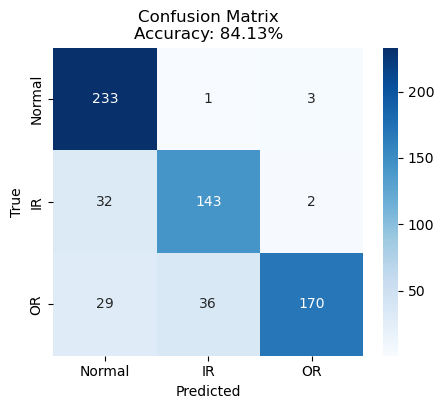

 - Model accuracy: 84.13%


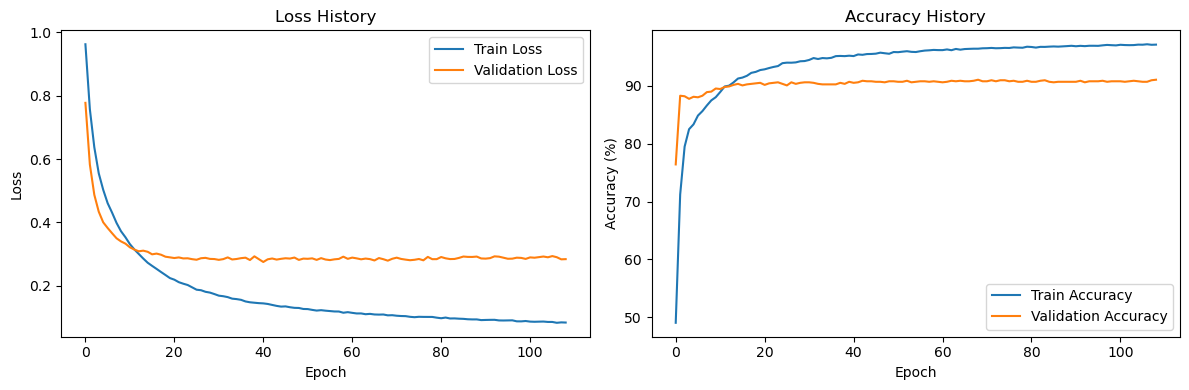

0.85
Early stopping at epoch 228


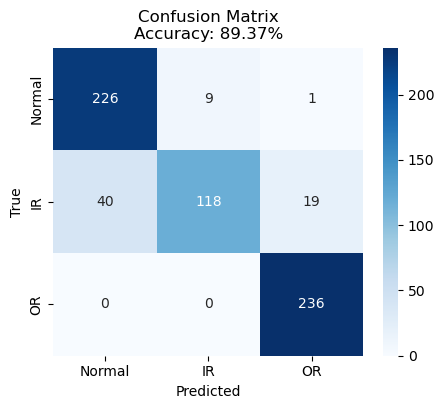

 - Model accuracy: 89.37%


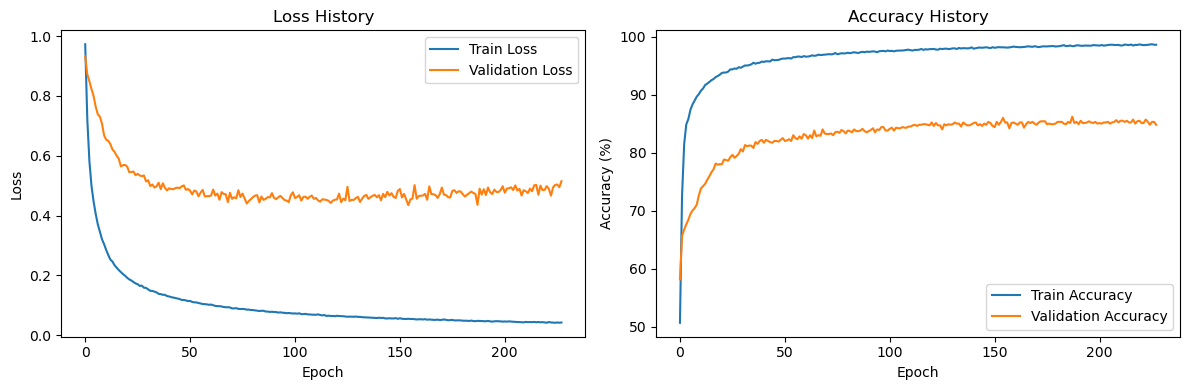

0.85
Early stopping at epoch 130


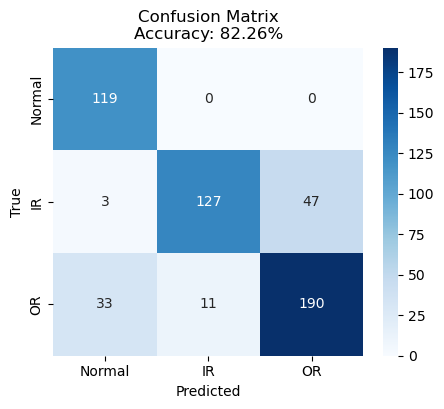

 - Model accuracy: 82.26%


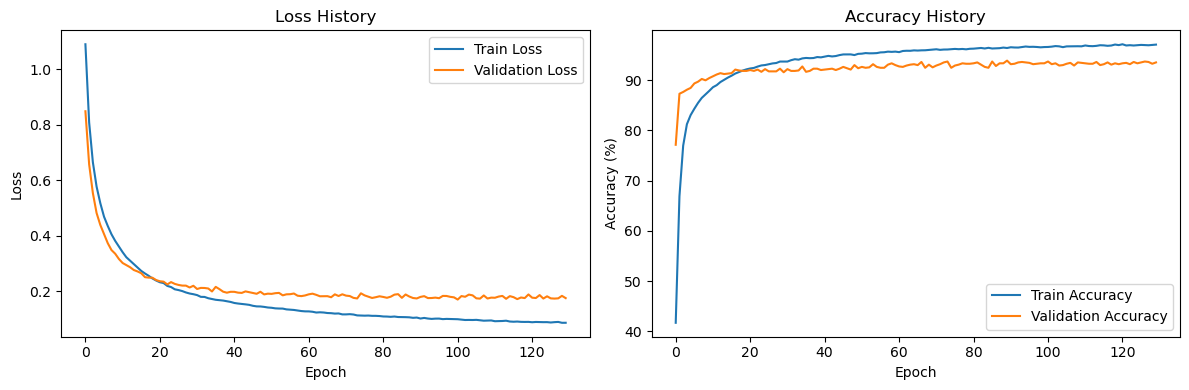

0.85
Early stopping at epoch 118


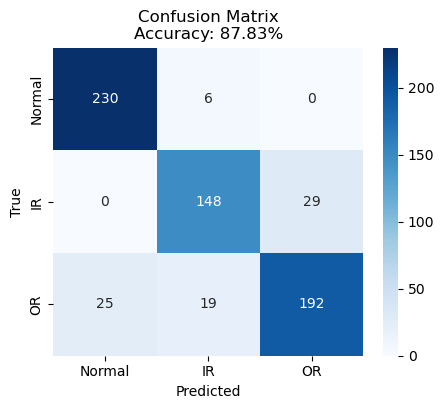

 - Model accuracy: 87.83%


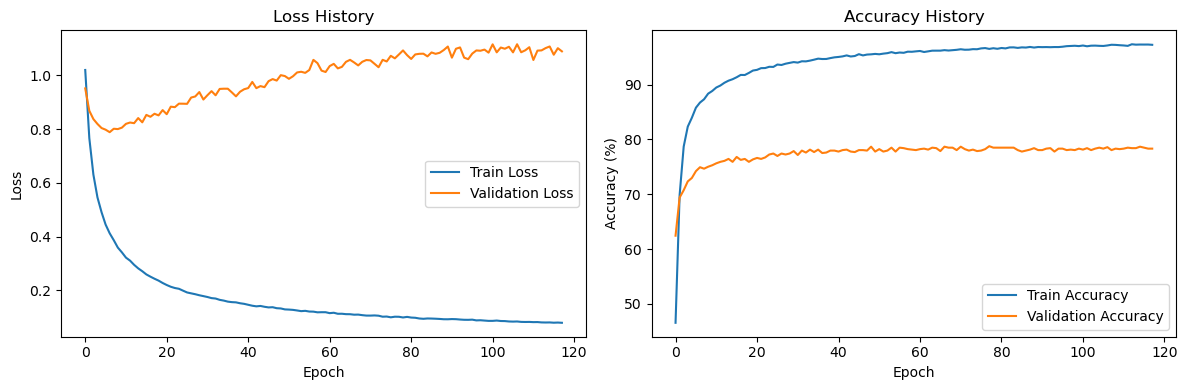

0.85
Early stopping at epoch 113


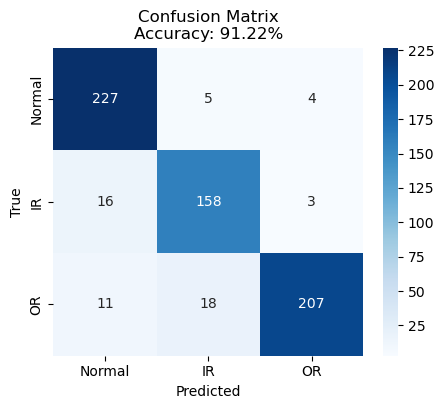

 - Model accuracy: 91.22%


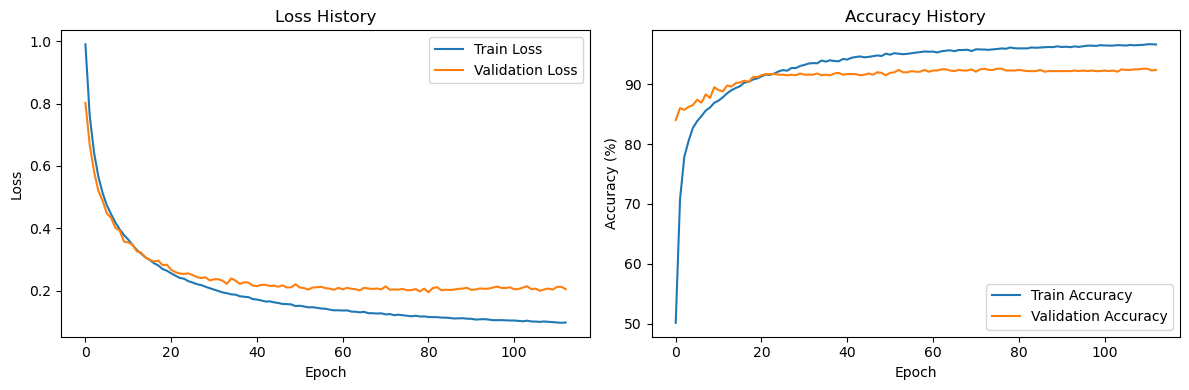

0.85
Early stopping at epoch 127


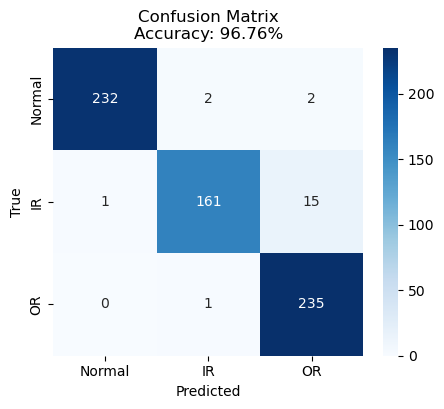

 - Model accuracy: 96.76%


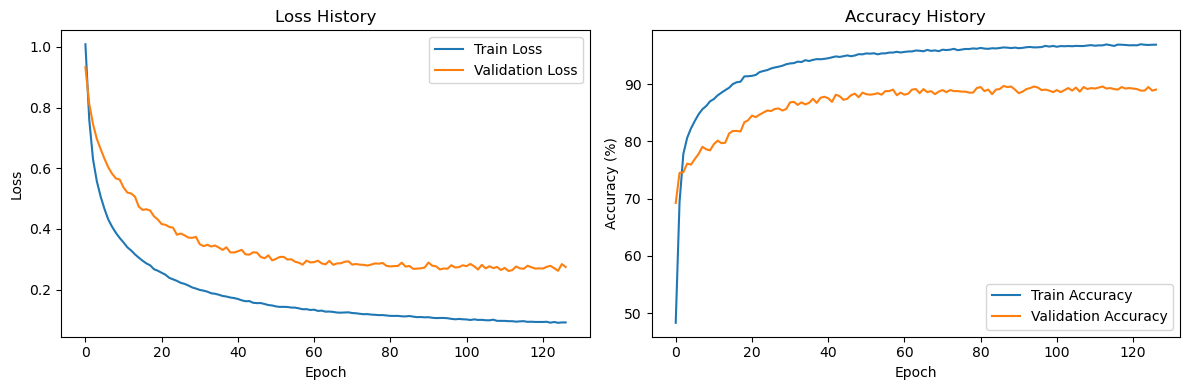

0.85
Early stopping at epoch 227


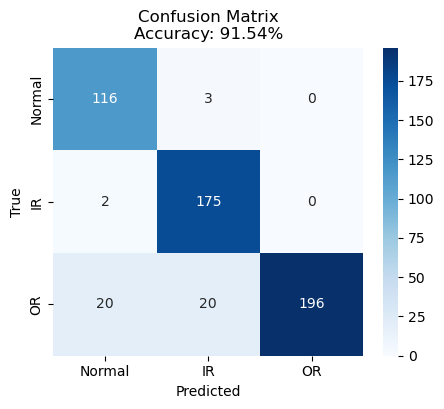

 - Model accuracy: 91.54%


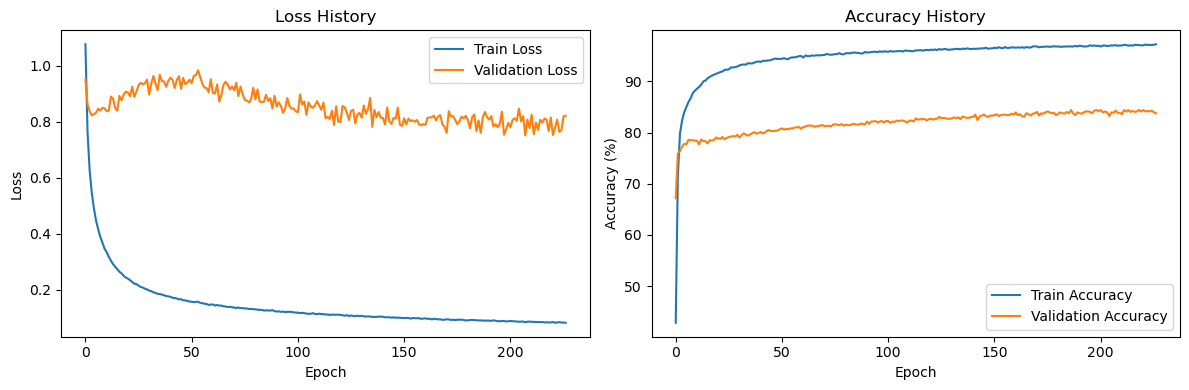

0.85
Early stopping at epoch 214


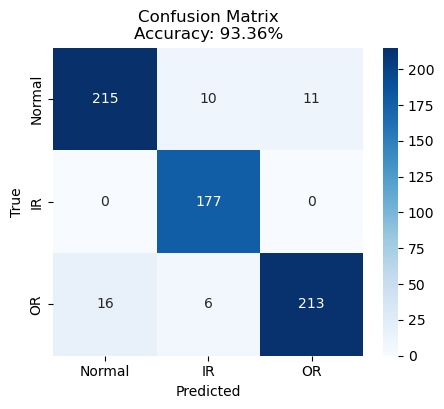

 - Model accuracy: 93.36%


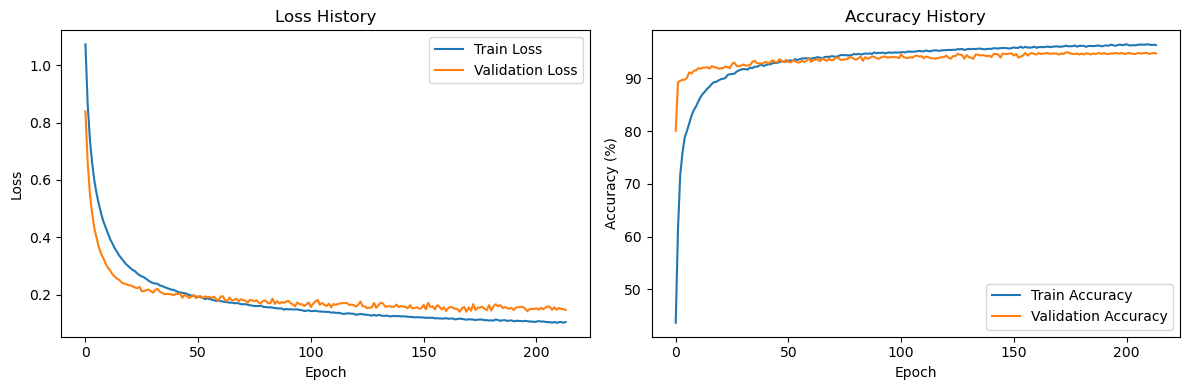

0.85
Early stopping at epoch 166


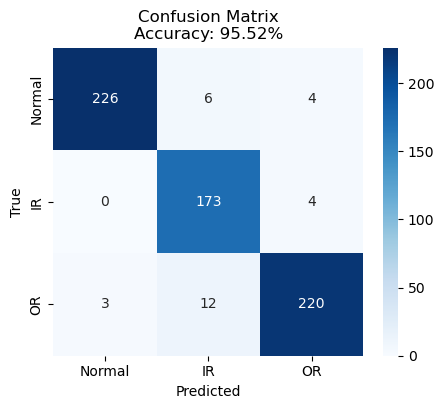

 - Model accuracy: 95.52%


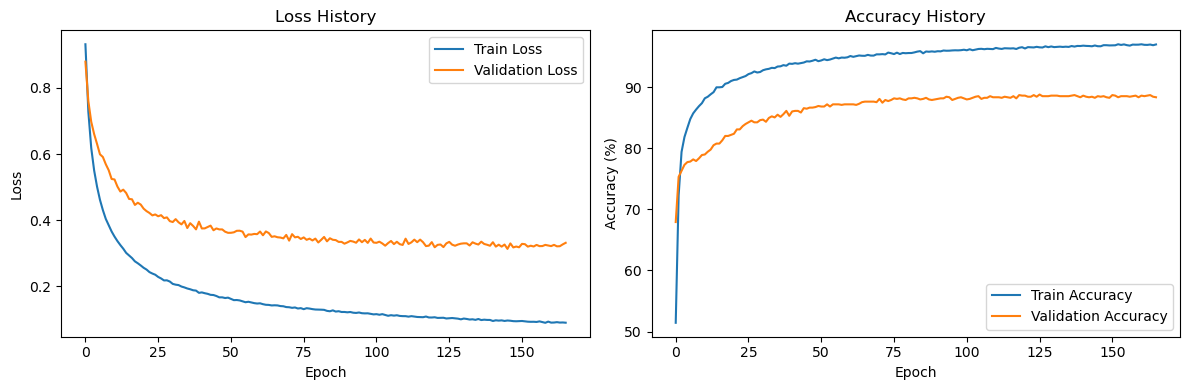

0.85
Early stopping at epoch 152


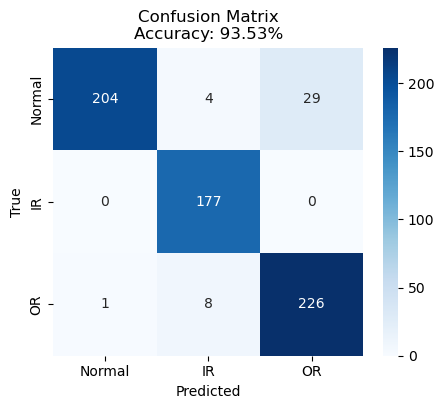

 - Model accuracy: 93.53%


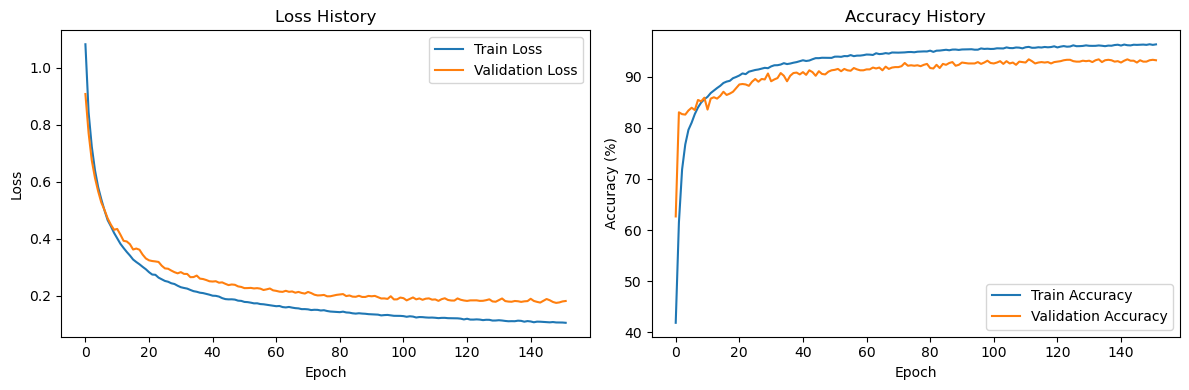

0.85
Early stopping at epoch 176


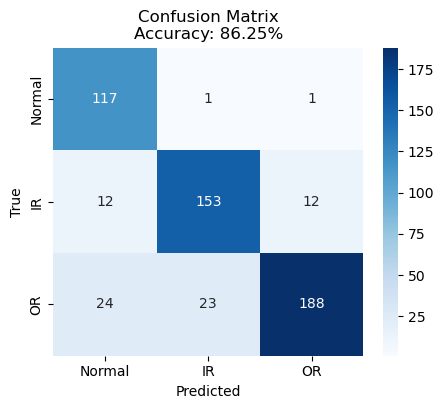

 - Model accuracy: 86.25%


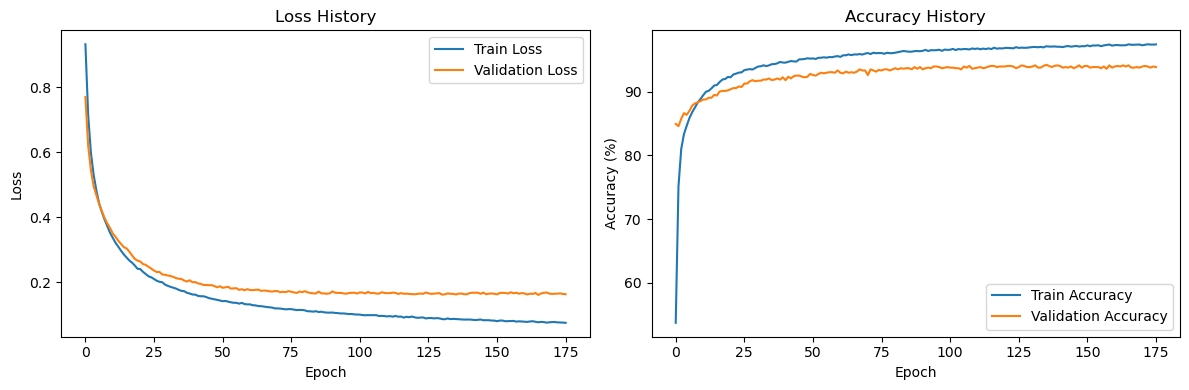

0.85
Early stopping at epoch 145


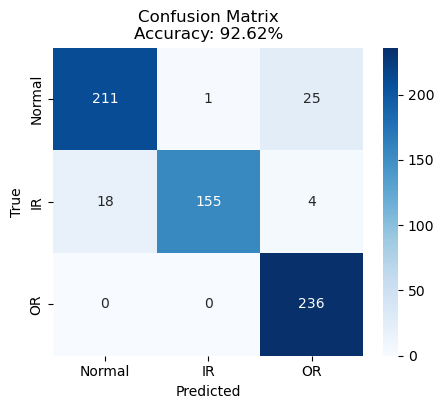

 - Model accuracy: 92.62%


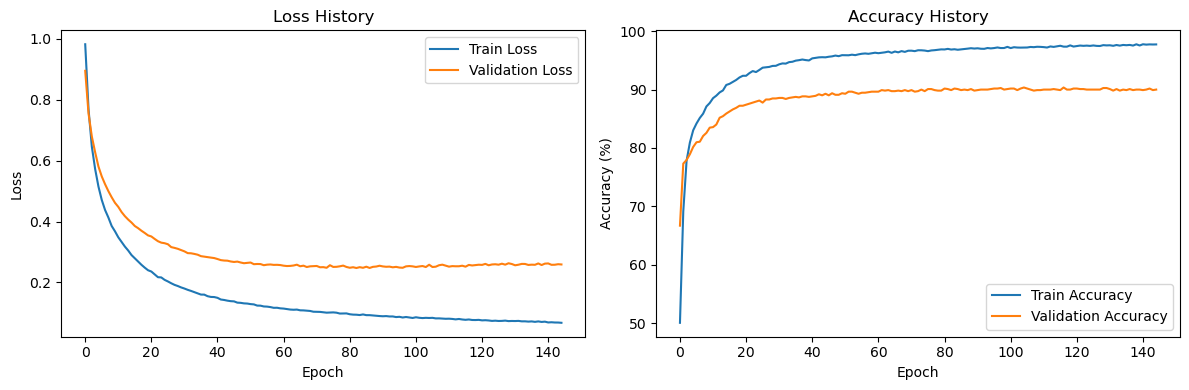

0.85
Early stopping at epoch 208


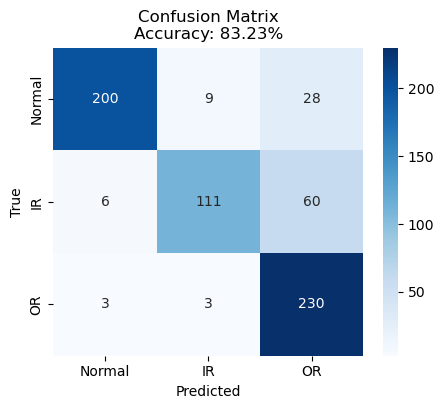

 - Model accuracy: 83.23%


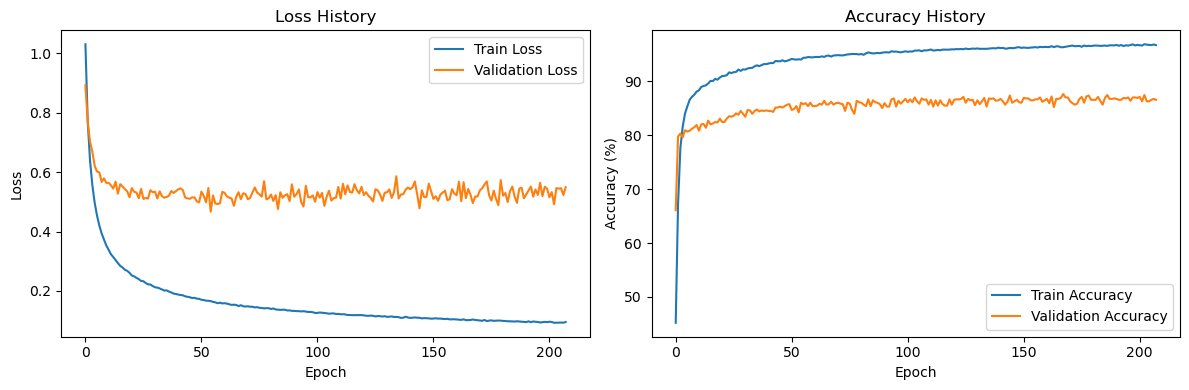

0.85
Early stopping at epoch 160


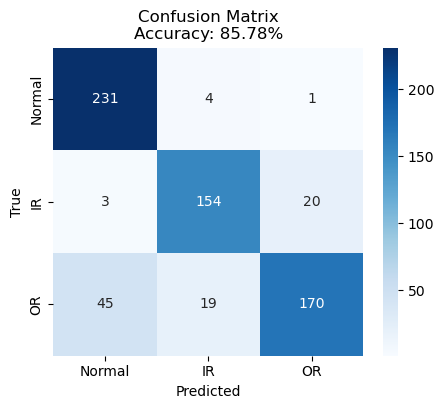

 - Model accuracy: 85.78%


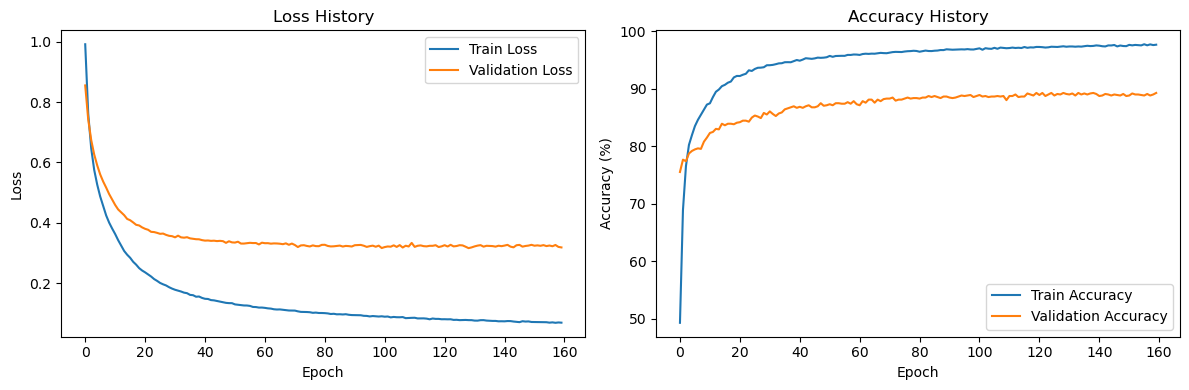

0.85
Early stopping at epoch 147


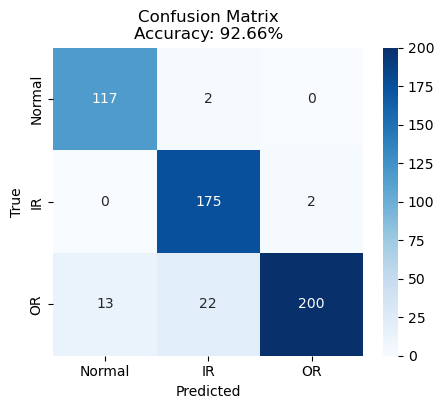

 - Model accuracy: 92.66%


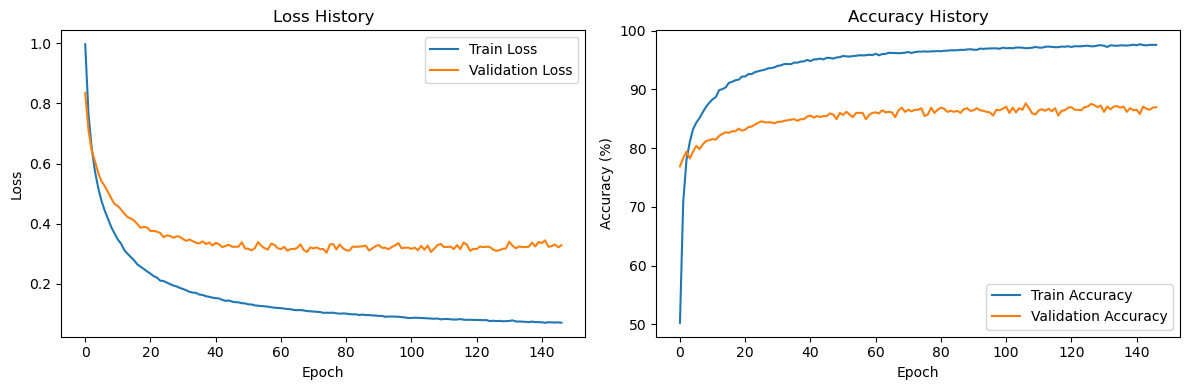

0.85
Early stopping at epoch 178


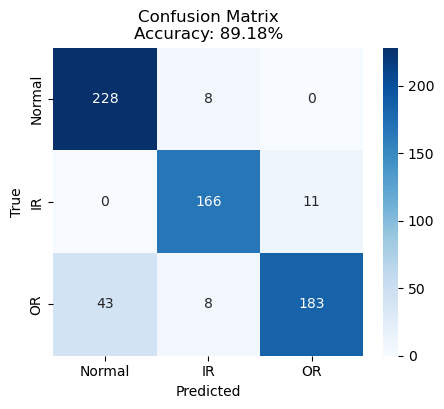

 - Model accuracy: 89.18%


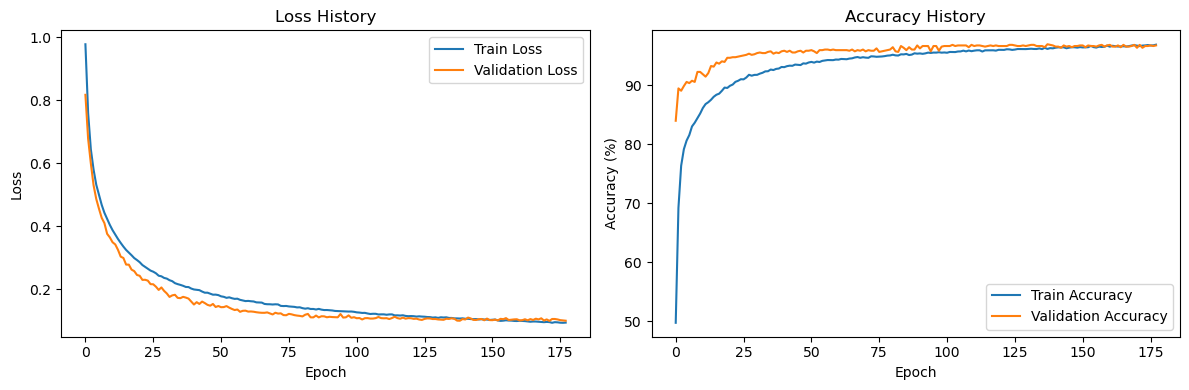

0.85
Early stopping at epoch 244


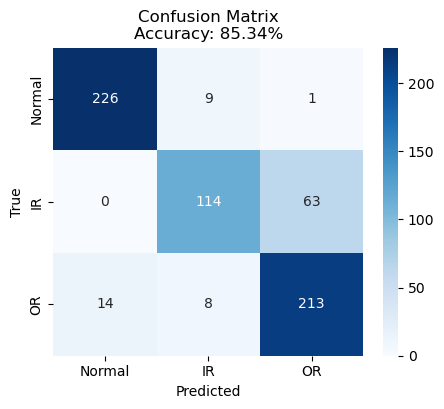

 - Model accuracy: 85.34%


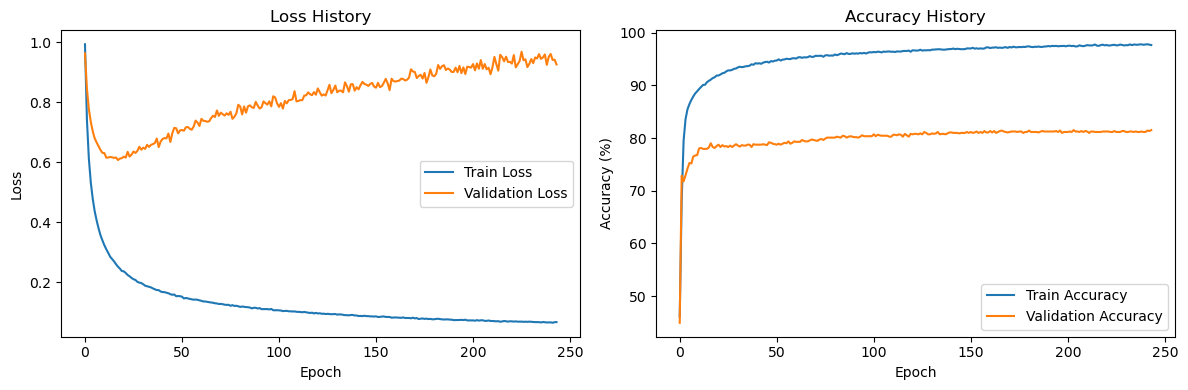

0.85
Early stopping at epoch 242


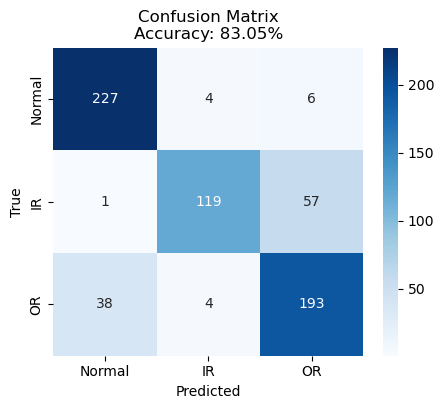

 - Model accuracy: 83.05%


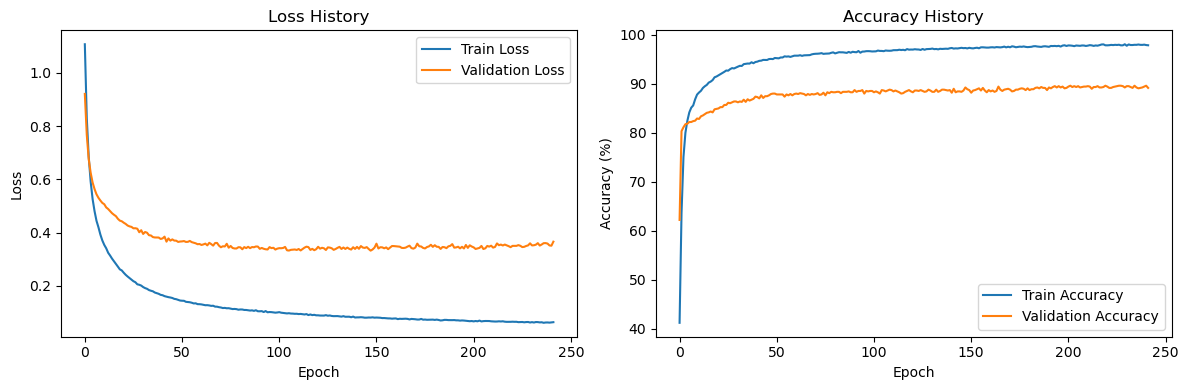

0.85
Early stopping at epoch 188


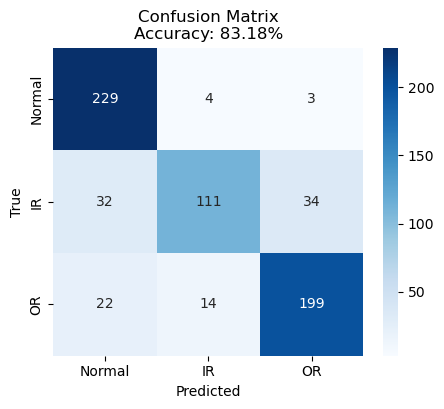

 - Model accuracy: 83.18%


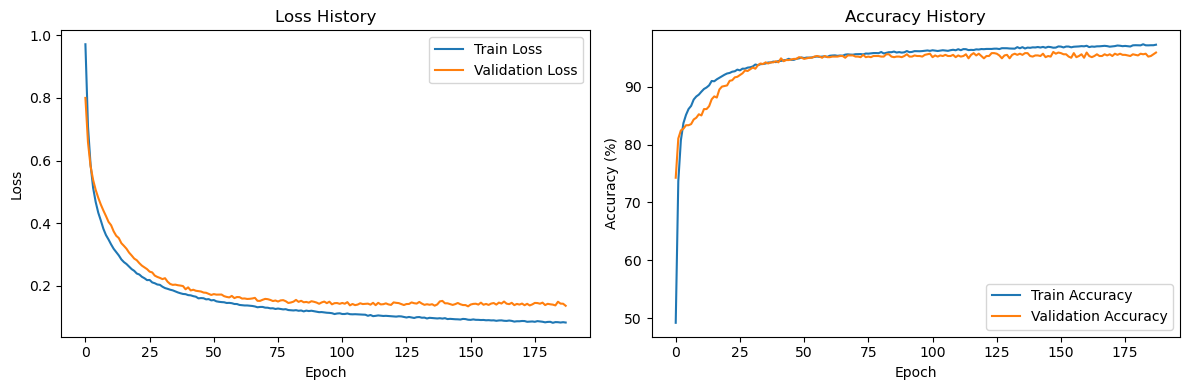

0.85
Early stopping at epoch 168


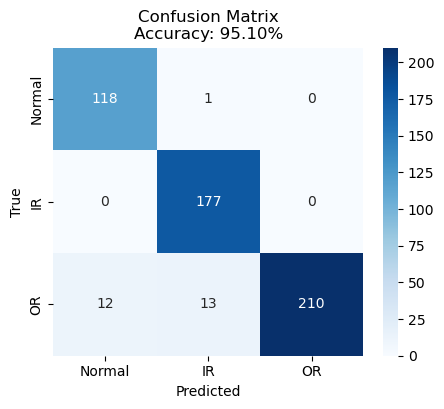

 - Model accuracy: 95.10%


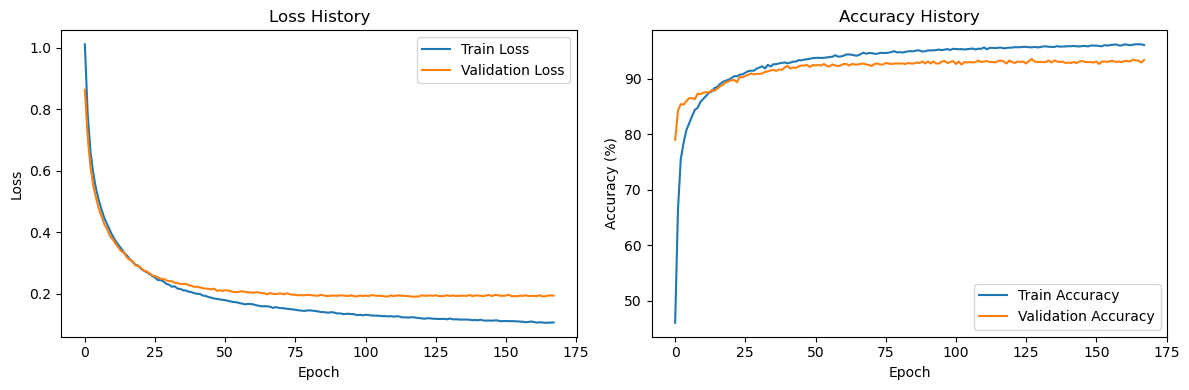

0.85
Early stopping at epoch 171


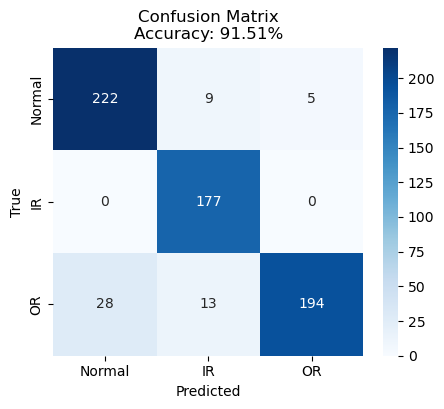

 - Model accuracy: 91.51%


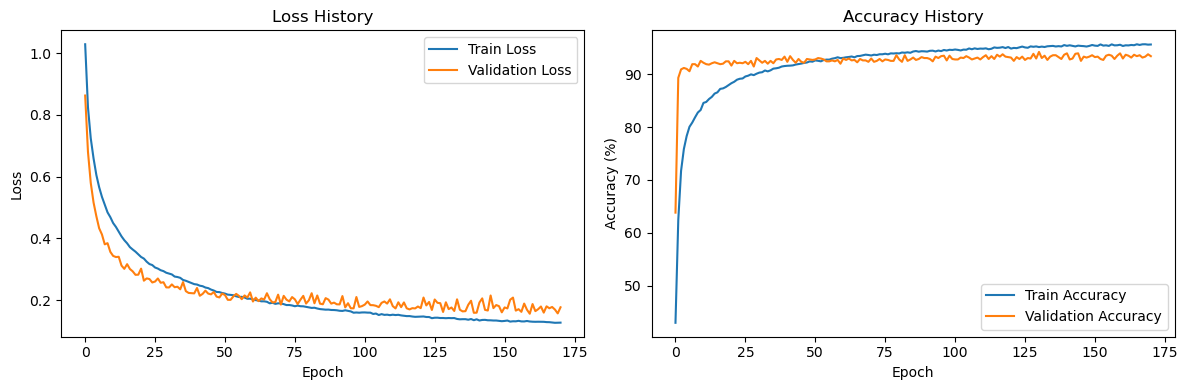

0.85
Early stopping at epoch 115


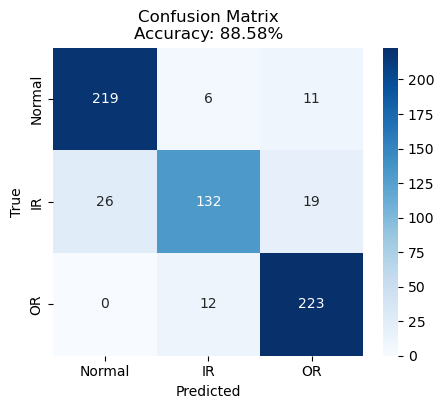

 - Model accuracy: 88.58%


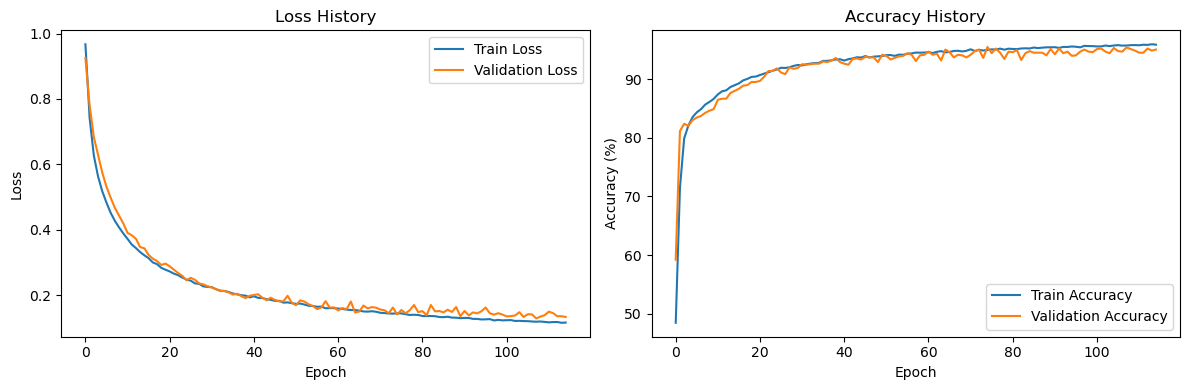

0.85
Early stopping at epoch 120


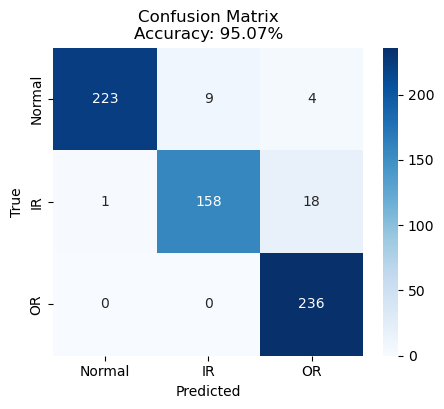

 - Model accuracy: 95.07%


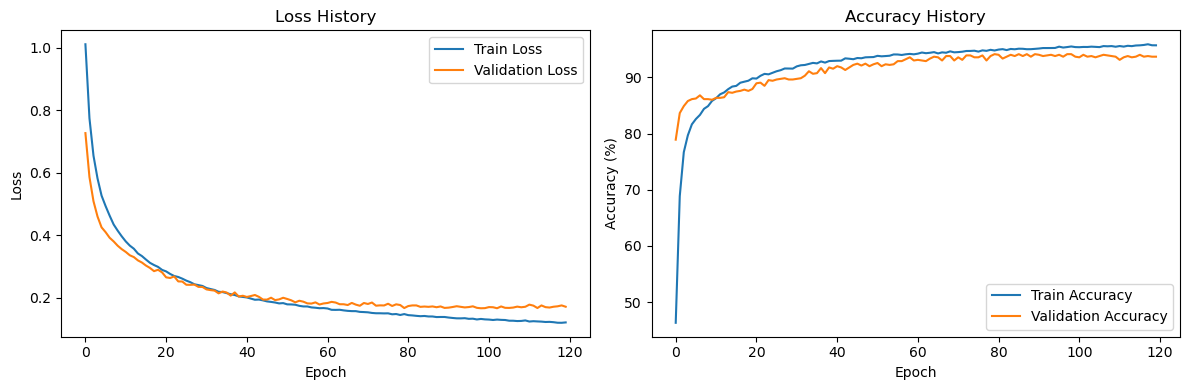

0.85
Early stopping at epoch 105


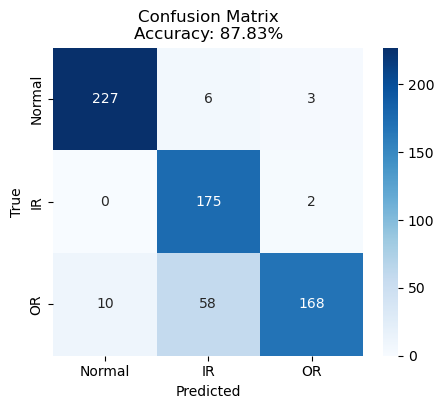

 - Model accuracy: 87.83%


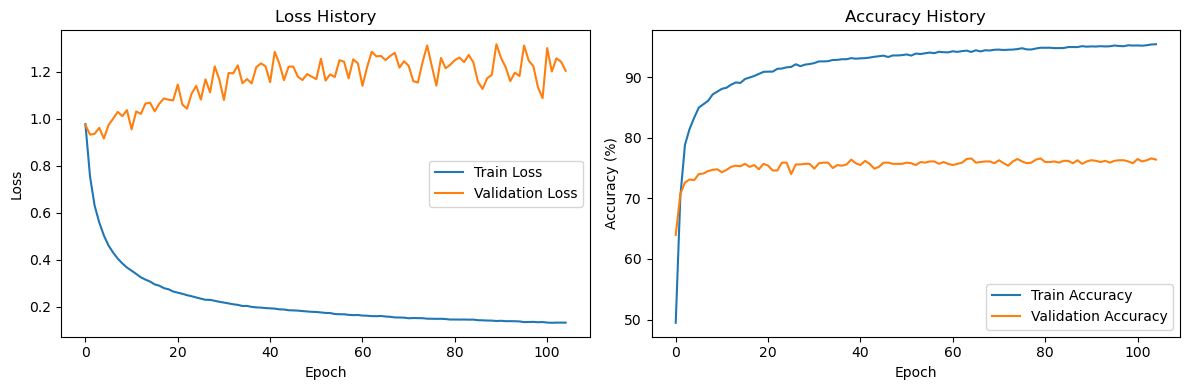

0.85
Early stopping at epoch 134


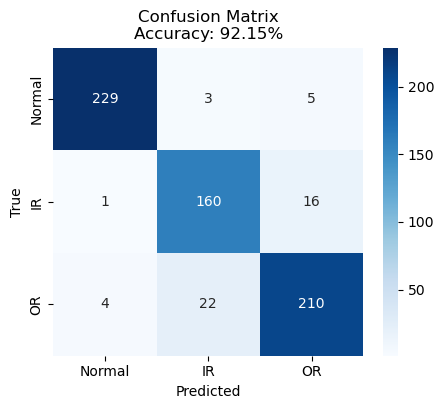

 - Model accuracy: 92.15%


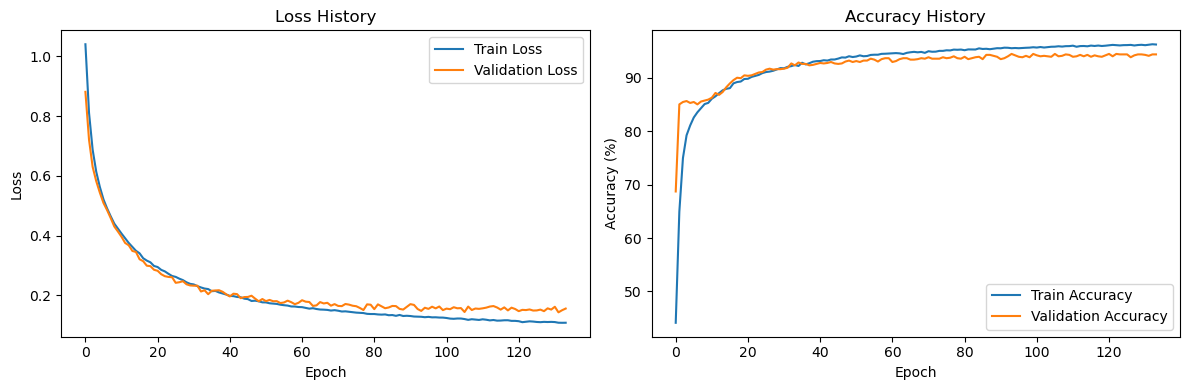

0.85
Early stopping at epoch 111


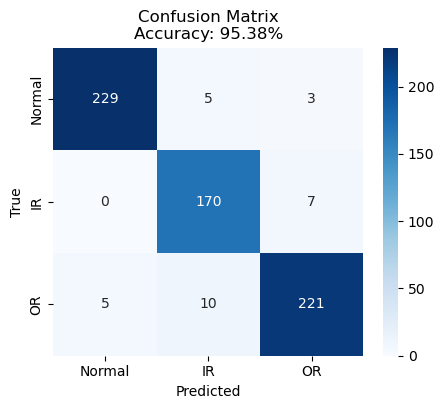

 - Model accuracy: 95.38%


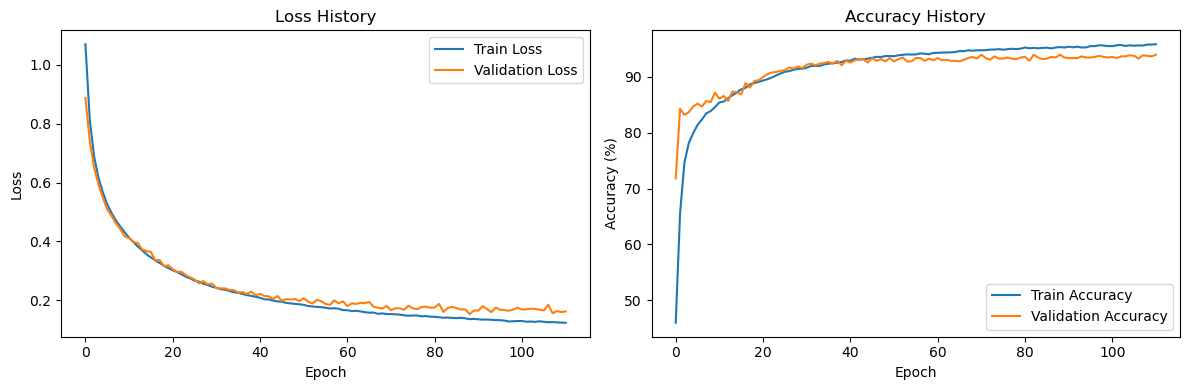

0.85
Early stopping at epoch 109


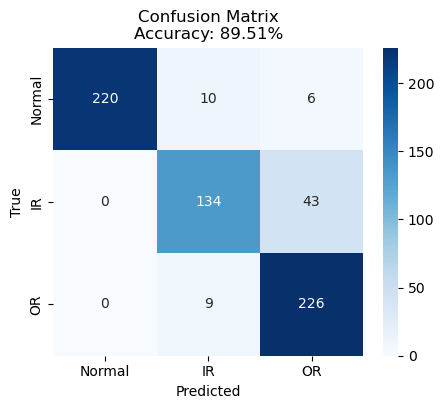

 - Model accuracy: 89.51%


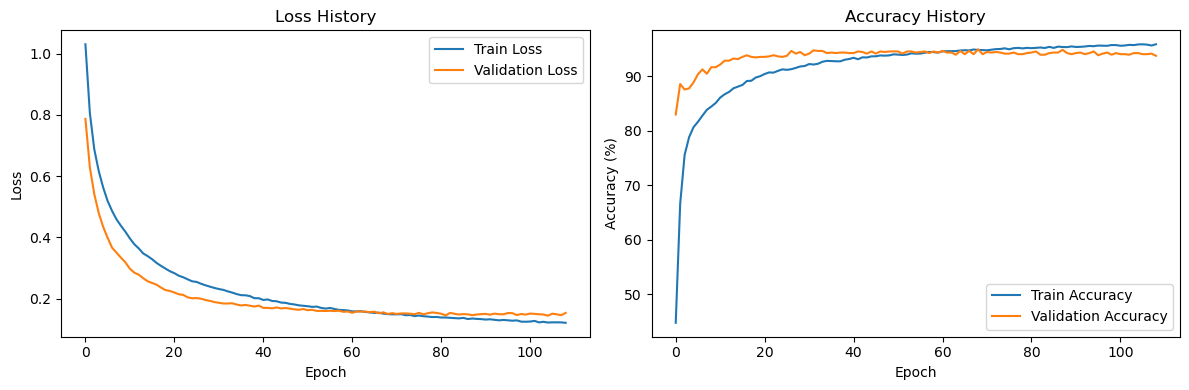

0.85
Early stopping at epoch 205


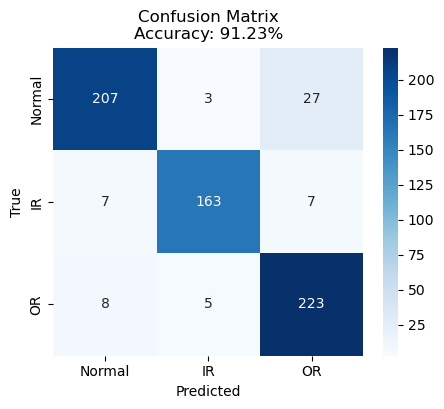

 - Model accuracy: 91.23%


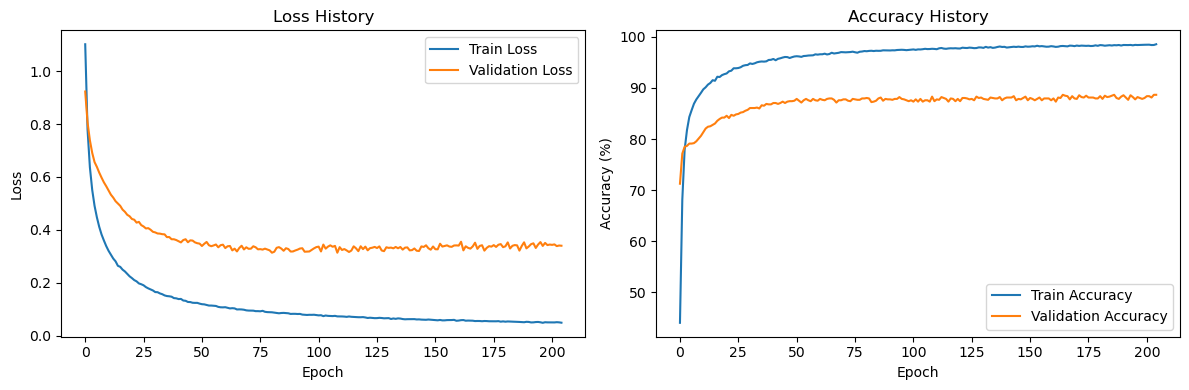

0.85
Early stopping at epoch 163


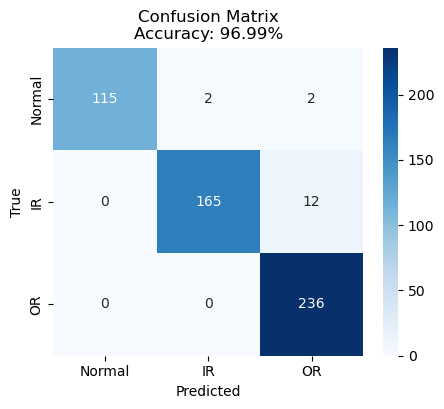

 - Model accuracy: 96.99%


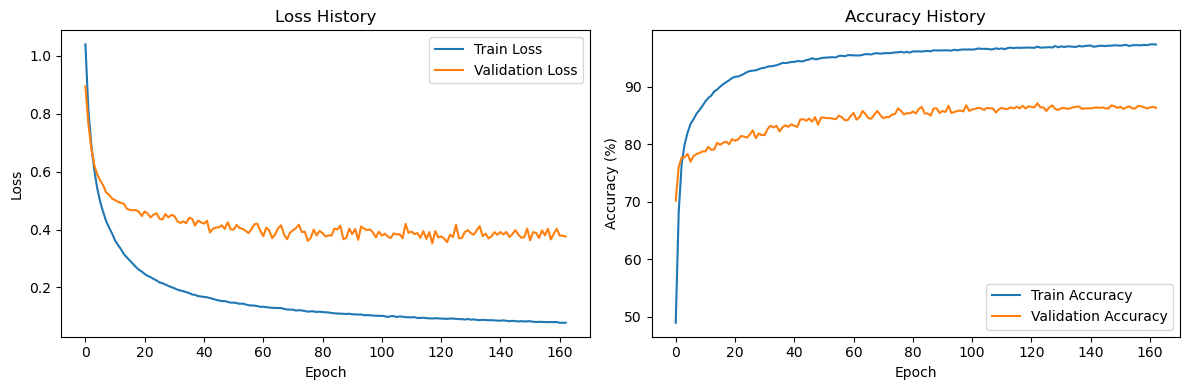

0.85
Early stopping at epoch 87


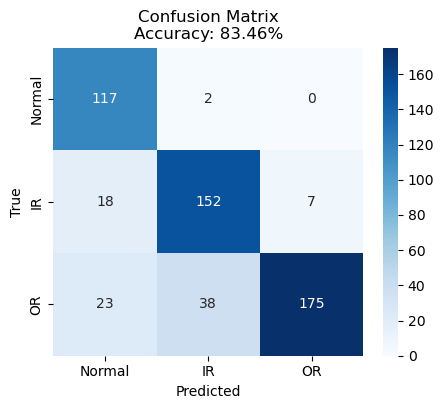

 - Model accuracy: 83.46%


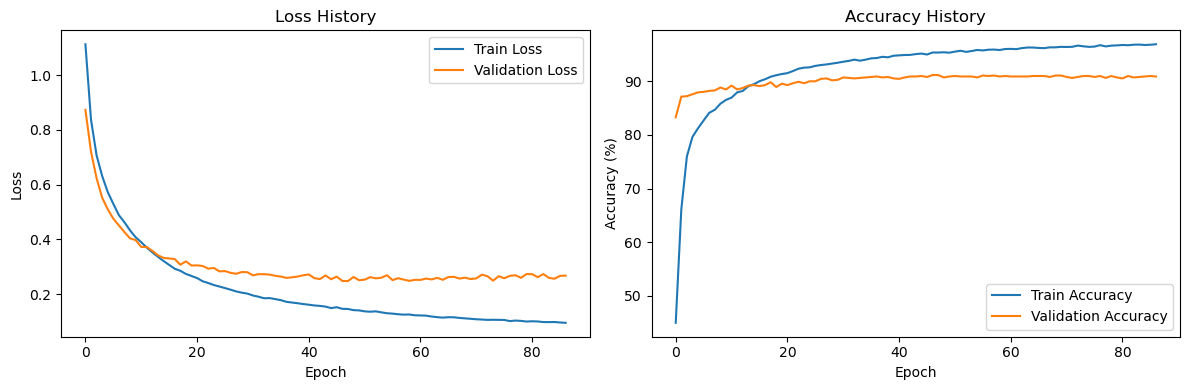

Mean accuracy: 0.8978778639470059
Std accuracy: 0.04466885431276393


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))